## Project Bimbingan Karir Data Science

Nama : Ni Made Kirei Kharisma Handayani

NIM : A11.2020.13106

BKDS01 - Data Scientist


Table of Contents :
- 1) Pengumpulan Data
- 2) Menelaah Data
- 3) Validasi Data
- 4) Menentukan Object Data
- 5) Membersihkan Data
- 6) Konstruksi Data
- 7) Modelling
- 8) Evaluasi
- 9) Streamlit
- 10) Kesimpulan

### 1) Pengumpulan Data

Dataset yang digunakan adalah dataset dengan nama "Hungarian.data" yang bersumber dari link berikut : https://archive.ics.uci.edu/dataset/45/heart+disease


### 2) Menelaah Data

- Pilih dan masukan library yang dibutuhkan untuk menelaah data

In [1]:
import pandas as pd
import re
import numpy as np
import itertools

#### Load Data

- Memasukkan dataset yang dibutuhkan dengan alamat penyimpanan yang tepat dan disimpan ke dalam sebuah variabel

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

#dir = '/content/drive/MyDrive/BK_2023/hungarian.data'
dir = 'D:\Project Python\Bimbingan Karir\Bimbingan-Karir-DS01\heart+disease\hungarian.data'

- Melakukan iterasi untuk membaca dataset

In [3]:
with open(dir, encoding='latin1') as file:
    lines = [line.strip() for line in file]

# Tampilkan 10 baris pertama
lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

- Setelah membaca file dataset, dilakukan iterasi sesuai jumlah kolom dan baris yang ada pada dataset. Untuk keterangan kolom dan baris dapat
dilihat melalui deskripsi dataset pada file "heart-disease.names"

In [4]:
data = itertools.takewhile(
    lambda x: len(x) == 76,
     (' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines), 10))
)

df = pd.DataFrame.from_records(data)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


- Menampilan informasi dari file dataset yang sudah dimasukkan ke dalam dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

Pada dataset ini terdapat kondisi khusus, dimana pada dataset ini nilai null disimbolkan dengan angka -9.0. Oleh sebab itu, sebelum memasuki tahap validasi data perlu dilakukan pengubahan tipe data menjadi float sehingga fitur dengan tipe data object berupa string perlu dihapus

- Menghapus kolom pada index 0 (ID pasien) dan index -1 (nama pasien)

In [6]:
df = df.iloc[:, :-1]
df = df.drop(df.columns[0], axis=1)

- Mengubah tipe data file dataset menjadi tipe data float sesuai dengan tipe data nilai null yaitu -9.0

In [7]:
df = df.astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

### 3) Validasi Data

Pada tahap ini bertujuan untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kondisinya



- Mengubah nilai -9.0 menjadi nilai null value sesuai dengan deskripsi dataset

In [9]:
df.replace(-9.0, np.nan, inplace = True)

- Menghitung jumlah nilai null value pada setiap atribut dataset

In [10]:
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

- Menampilkan dataset

In [11]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

#### 4) Menentukan Object Data

- Memilih 14 fitur yang akan digunakan sesuai dengan deskripsi dataset

In [13]:
df_selected = df.iloc[:, [1, 2, 7, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]]

df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [14]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


- Mengganti nama kolom sesuai dengan 14 nama kolom yang ada pada deskripsi dataset

In [15]:
column_mapping = {
    2 : 'age',
    3 : 'sex',
    8 : 'cp',
    9 : 'trestbps',
    11 : 'chol',
    15 : 'fbs',
    18 : 'restecg',
    31 : 'thalach',
    37 : 'exang',
    39 : 'oldpeak',
    40 : 'slope',
    43 : 'ca',
    50 : 'thal',
    57 : 'target'
}

In [16]:
df_selected.rename(columns=column_mapping, inplace=True)

C:\Users\Kirei\AppData\Local\Temp\ipykernel_33084\3799284956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [17]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


- Menghitung nilai unik pada tiap atribut data

In [18]:
df_selected.nunique()

age          38
sex           2
cp            4
trestbps     31
chol        153
fbs           2
restecg       3
thalach      71
exang         2
oldpeak      10
slope         3
ca            2
thal          3
target        5
dtype: int64

- Menghitung frekuensi kemunculan setiap nilai unik dalam suatu fitur pada dataset

In [19]:
# mengecek frekuensi data pada setiap atribut
for col in df.columns:
    print(col,': ')
    print(df[col].value_counts())
    print("  ")
    print("  ")

1 : 
1
0.0    294
Name: count, dtype: int64
  
  
2 : 
2
54.0    25
48.0    19
52.0    17
49.0    15
55.0    15
46.0    13
50.0    12
53.0    12
43.0    12
41.0    11
39.0    11
47.0    10
56.0    10
58.0     9
51.0     9
59.0     8
45.0     8
37.0     8
40.0     7
44.0     7
38.0     7
42.0     7
36.0     5
35.0     5
57.0     5
34.0     4
32.0     4
65.0     3
31.0     2
60.0     2
33.0     2
61.0     2
29.0     2
62.0     2
63.0     1
66.0     1
28.0     1
30.0     1
Name: count, dtype: int64
  
  
3 : 
3
1.0    213
0.0     81
Name: count, dtype: int64
  
  
4 : 
4
1.0    271
0.0     23
Name: count, dtype: int64
  
  
5 : 
5
0.0    164
1.0    130
Name: count, dtype: int64
  
  
6 : 
6
1.0    153
0.0    141
Name: count, dtype: int64
  
  
7 : 
Series([], Name: count, dtype: int64)
  
  
8 : 
8
4.0    123
2.0    106
3.0     54
1.0     11
Name: count, dtype: int64
  
  
9 : 
9
120.0    65
130.0    54
140.0    50
150.0    23
110.0    21
160.0    20
125.0     8
100.0     6
180.0     6
13

### 5) Membersihkan Data

Sebelum melakukan pemodelan dilakukan pembersihan data agar model yang dihasilkan lebih akurat

- Menghitung jumlah null values yang ada di dalam dataset

In [20]:
#df_selected.isnull().sum()

pd.DataFrame({"Null Value":df_selected.isna().sum(), "Percent":df_selected.apply(lambda x: f'{((x.isnull().sum()/df_selected.shape[0])*100).round(2)} %')})

,Null Value,Percent
age,0,0.0 %
sex,0,0.0 %
cp,0,0.0 %
trestbps,1,0.34 %
chol,23,7.82 %
fbs,8,2.72 %
restecg,1,0.34 %
thalach,1,0.34 %
exang,1,0.34 %
oldpeak,0,0.0 %


Berdasarkan output dari kode program di atas, terdapat beberapa fitur yang hampir 90% datanya memiliki nilai null sehingga perlu dilakukan penghapusan fitur menggunakan fungsi drop pada fitur dengan persentase null values di atas 50%

- Menghapus fitur 'ca', 'slope', 'thal'

In [21]:
columnns_to_drop = ['ca', 'slope', 'thal']
df_selected = df_selected.drop(columnns_to_drop, axis=1)

df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

Dikarenakan masih ada nilai null pada beberapa kolom fitur, maka akan dilakukan pengisian nilai null menggunakan nilai mean di setiap kolom tersebut

- Memperoleh nilai rata-rata dari kolom

In [22]:
# menghapus semua nilai null dari kolom untuk menghitung rata-rata
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()

# mengubah tipe data menajadi float
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanRestCG = meanRestCG.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)

# mencari nilai rata-rata dari kolom
meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanRestCG = round(meanRestCG.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())

- Mengisi nilai null dengan nilai mean yang sudah diperoleh sebelumnya

In [23]:
fill_values = {
    'trestbps' : meanTBPS,
    'chol' : meanChol,
    'fbs' : meanfbs,
    'thalach' : meanthalach,
    'exang' : meanexang,
    'restecg' : meanRestCG
    }

dfClean = df_selected.fillna(value=fill_values)

In [24]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [25]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

- Melakukan pengecekan terhadap duplikaksi data

In [26]:
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [27]:
print("All Duplicate Rows : ")
# menghasilkan dataframe yang hanya berisi baris-baris yang memiliki duplikat
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows : 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


- Menghapus data yang memiliki duplikat

In [28]:
dfClean = dfClean.drop_duplicates()
print("All Duplicate Rows : ")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows : 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [29]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


- Menghitung frekuensi munculnya tiap nilai target

In [30]:
dfClean['target'].value_counts()

target
0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: count, dtype: int64

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

- Mencari korelasi antar fitur

In [32]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<Axes: >

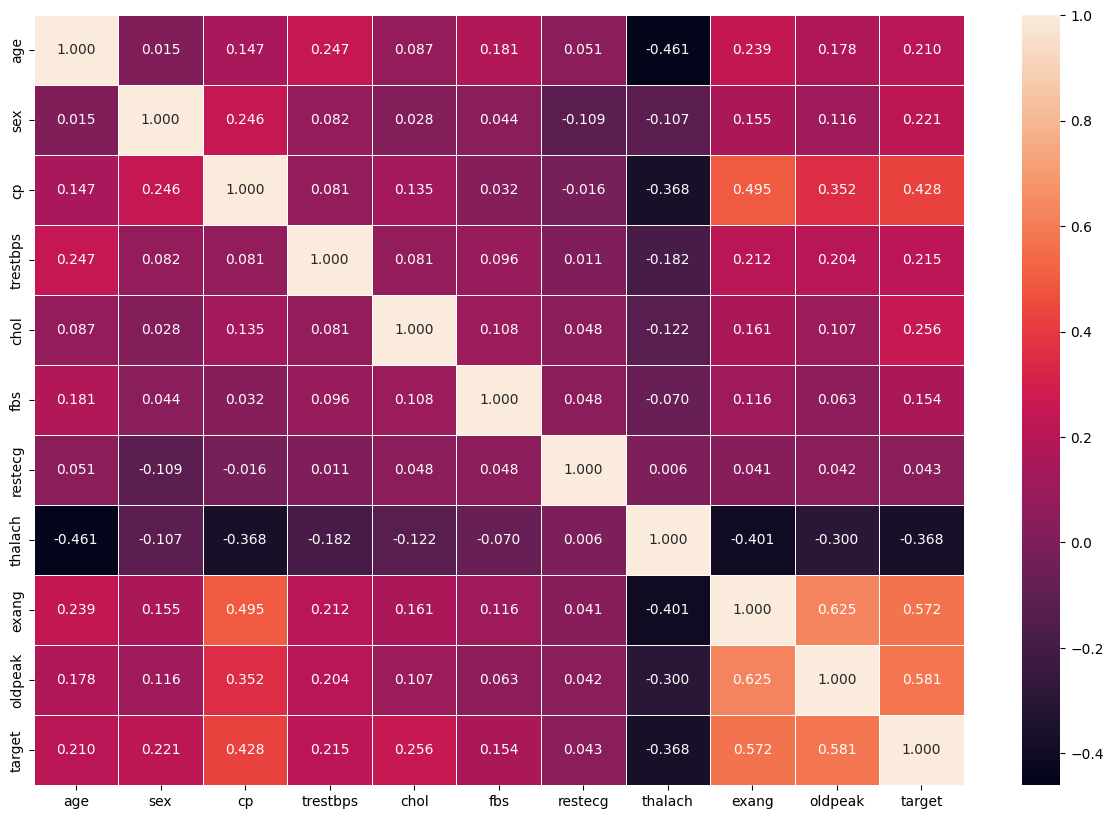

In [33]:
cor_mat = dfClean.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cor_mat, annot=True, linewidths=0.5, fmt=".3f")

### 6) Konstruksi Data

Salah satu tujuan konstruksi data yaitu untuk menyesuaikan semua tipe data yang ada di dalam dataset. Namun, pada
tahap ini dataset sudah memiliki tipe data yang sesuai sehingga tidak perlu dilakukan penyesuaian kembali



In [34]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


In [35]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


Setelah menyesuaikan tipe dataset, fitur dan target harus dipisahkan lalu disimpan ke dalam variabel.

In [36]:
X = dfClean.drop("target", axis=1).values
y = dfClean.iloc[:, -1]

Setelah memisahkan antara fitur dan target , sebaiknya dilakukan pengecekan terlebih dahulu terhadap persebaran jumlah target.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '4.0')])

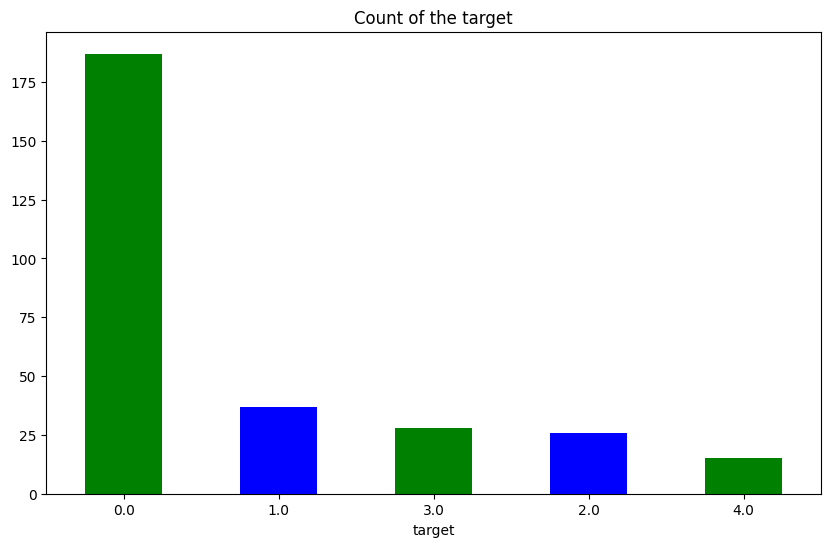

In [37]:
dfClean['target'].value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue'])
plt.title("Count of the target")
plt.xticks(rotation=0)

Grafik di atas menunjukan bahwa persebaran jumlah target tidak seimbang. Oleh karena itu, data target perlu diseimbangkan terlebih dahulu.

Terdapat 2 cara menyeimbangkan data target yaitu oversampling dan undersampling.
Oversampling dilakukan jika jumlah dataset sedikit sedangkan undersampling dilakukan jika jumlah data terlalu banyak.

Pada kasus ini, penyeimbangan data akan dilakukan dengan oversampling karena jumlah data tidak banyak. Terdapat beberapa metode oversampling, salah satunya yang akan digunakan pada kasus ini adalah SMOTE

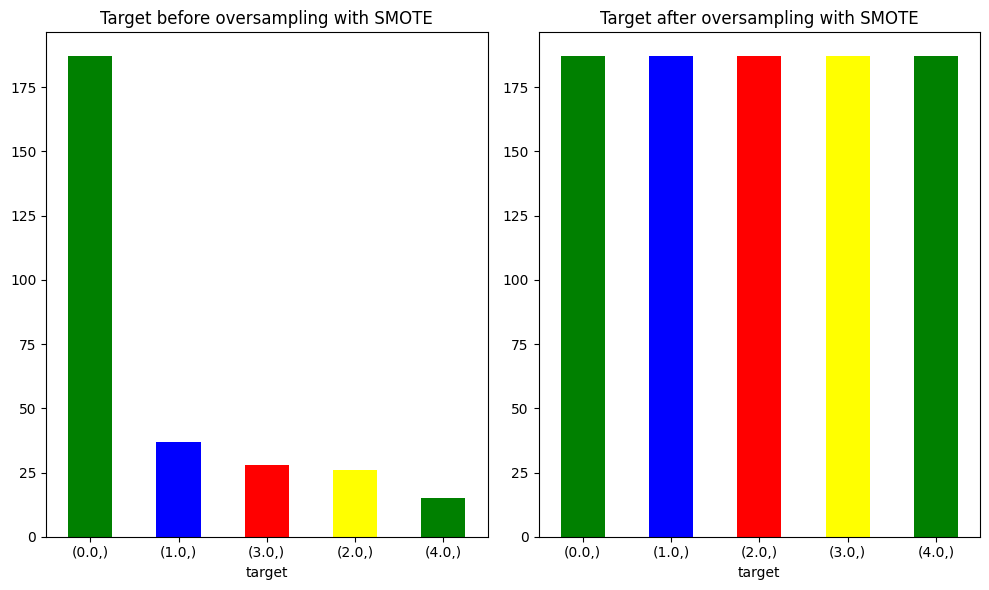

In [38]:
from imblearn.over_sampling import SMOTE

# Oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

plt.figure(figsize=(12,4))

new_df1 = pd.DataFrame(data=y)

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar', figsize=(10, 6), color=['green','blue','red','yellow'])
plt.title("Target before oversampling with SMOTE")
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'yellow'])
plt.title("Target after oversampling with SMOTE")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Grafik di atas menunjukkan perbandingan grafik ketika target belum diseimbangkan dan sudah diseimbangkan dengan oversampling

- Kondisi data sebelum oversampling

In [39]:
new_df1 = pd.DataFrame(data = y)
new_df1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
Name: count, dtype: int64

- Kondisi data setelah oversampling

In [40]:
new_df2 = pd.DataFrame(data = y_smote_resampled)
new_df2.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
Name: count, dtype: int64

Setelah menyeimbangkan persebaran jumlah target, selanjutnya adalah melakukan pengecekan apakah normalisasi/standarisasi perlu dilakukan pada
dataset.

- Menampilkan statistik deskriptif sebelum data dinormalisasi

In [41]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


Pada deskripsi di atas dapat dilihat bahwa terdapat rentang nilai yang cukup jauh pada nilai standar deviasi setiap fitur dataset. Oleh karena itu, perlu dilakukan normalisasi/standarisasi untuk memperkecil rentang antara standar deviasi setiap fitur.

- Menormalisasikan data dengan MinMaxScaler()

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)
len(X_smote_resampled_normal)

935

- Menyimpan MinMax Scaler dengan pickle

In [43]:
import pickle

with open('scaler_model.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

- Menampilkan hasil statistik deskriptif setelah data dinormalisasi

In [44]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Setelah dilakukan normalisasi pada fitur, selanjutnya fitur dan target dibagi menjadi data train dan test.

In [45]:
from sklearn.model_selection import train_test_split

# Membagi fitur dan target menjadi data train dan data test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

# Membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size = 0.2, random_state = 42, stratify=y_smote_resampled)

### 7) Model

Pada tahap ini kita akan memulai untuk membangun sebuah model.

- Membuat fungsi untuk menampilkan hasil akurasi dan rata - rata dari recall , f1 dan precision score setiap model. Fungsi
ini nantinya akan dipanggil di setiap model. Fungsi ini bersifat opsional (dapat dibuat atau tidak)

In [46]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, precision_score

def evaluation(Y_test, Y_pred) :
  acc = accuracy_score(Y_test,Y_pred)
  rcl = recall_score(Y_test, Y_pred, average='weighted')
  f1 = f1_score(Y_test, Y_pred, average='weighted')
  ps = precision_score(Y_test, Y_pred, average='weighted')

  metric_dict = {'accuracy' : round(acc, 3),
                 'recall' : round(rcl,3),
                 'F1 Score' : round(f1, 3),
                 'Precision Score' : round(ps, 3)}
  print(metric_dict)

### Oversample

### KNN

Pada tahap ini, model akan mulai dibangun menggunakan algoritma KNN dengan nilai neighbors = 3.

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

- Menampilkan hasil akurasi dengan algoritma KNN

In [48]:
y_pred_knn = knn_model.predict(X_test)

In [49]:
# Evaluate the KNN Model
print("K-Nearest Neighbors (KNN) Model : ")
accuracy_knn_smote = round(accuracy_score(y_test, y_pred_knn), 3)
print("Accuracy :", accuracy_knn_smote)
print("Classification Report :")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model : 
Accuracy : 0.754
Classification Report :
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



In [50]:
evaluation(y_test, y_pred_knn)

{'accuracy': 0.754, 'recall': 0.754, 'F1 Score': 0.741, 'Precision Score': 0.745}


- Menampilkan visualisasi confusion matrix untuk membandingkan hasil prediksi model dengan nilai sebenarnya.

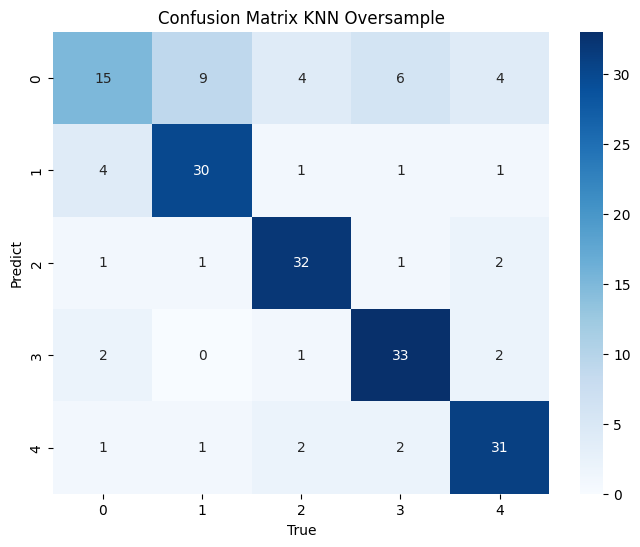

In [51]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix KNN Oversample')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Random Forest

Selanjutnya akan dibangun model menggunakan algoritma random forest dengan n_estimators yaitu 100, n_estimators berguna untuk mengatur jumlah pohon keputusan yang akan dibangun

In [52]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- Menampilkan hasil evaluasi dari algoritma RandomForest

In [53]:
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Model : ")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf), 3)
print("Accuracy :", accuracy_rf_smote)
print("Classification Report : ")
print(classification_report(y_test, y_pred_rf))

Random Forest Model : 
Accuracy : 0.92
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [54]:
evaluation(y_test, y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 Score': 0.92, 'Precision Score': 0.922}


- Menampilkan hasil Confusion Matrix dari RandomForest

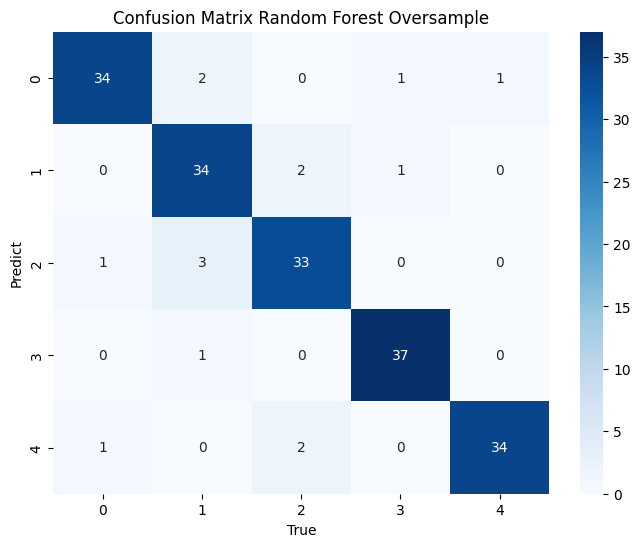

In [55]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Random Forest Oversample")
plt.xlabel("True")
plt.ylabel("Predict")
plt.show()

### XGBoost

Pada tahap ini akan dibangun model dengan menggunakan algoritma XGBoost dengan learning rate yaitu 0.1. learning rate berguna
untuk mengontrol seberapa besar kita menyesuaikan bobot model.

In [56]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

- Menampilkan hasil evaluasi dari algoritma XGBoost

In [57]:
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("XGBoost Model : ")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb), 3)
print("Accuracy :", accuracy_xgb_smote)
print("Classification Report : ")
print(classification_report(y_test, y_pred_xgb))

XGBoost Model : 
Accuracy : 0.904
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [58]:
evaluation(y_test, y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 Score': 0.904, 'Precision Score': 0.906}


- Menampilkan hasil Confusion Matrix dari XGBoost

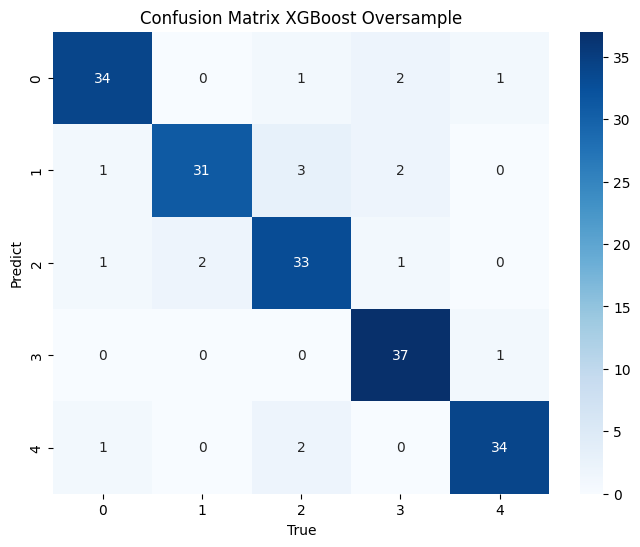

In [59]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix XGBoost Oversample')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Oversample + Normalisasi

Pada bagian ini akan dibuat sebuah model yang dimana data yang dipakai kali ini sudah dilakukan oversample dan normalisasi.

Algoritma yang digunakan sama seperti sebelumnya yaitu KNN, Random Forest, dan XGBoost. Sekaligus dibuat visualisasi hasil evaluasi pada masing-masing model.

### KNN

- Membangun dan melatih model KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model_normal = KNeighborsClassifier(n_neighbors=3)
knn_model_normal.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

- Menampilkan hasil evaluasi dari KNN dengan normalisasi

In [61]:
y_pred_knn_normal = knn_model_normal.predict(X_test_normal)

# Evaluate the KNN Model
print("K-Nearest Neighbors (KNN) Model : ")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal, y_pred_knn_normal), 3)
print("Accuracy :", accuracy_knn_smote_normal)
print("Classification Report : ")
print(classification_report(y_test_normal, y_pred_knn_normal))

K-Nearest Neighbors (KNN) Model : 
Accuracy : 0.861
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [62]:
evaluation(y_test_normal, y_pred_knn_normal)

{'accuracy': 0.861, 'recall': 0.861, 'F1 Score': 0.861, 'Precision Score': 0.863}


- Menampilkan hasil Confusion Matrix dari KNN dengan normalisasi

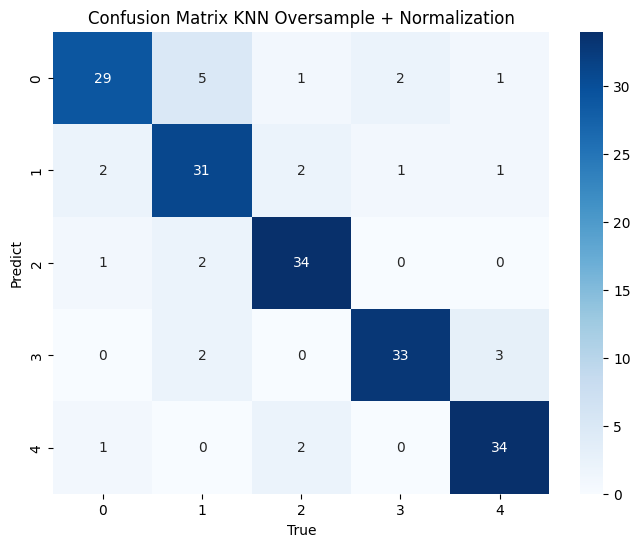

In [63]:
cm = confusion_matrix(y_test_normal, y_pred_knn_normal)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix KNN Oversample + Normalization')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Random Forest

- Membangun dan melatih model RandomForest

In [64]:
rf_model_normal = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_normal.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

- Menampilkan hasil evaluasi dari RandomForest dengan normalisasi

In [65]:
y_pred_rf_normal = rf_model_normal.predict(X_test_normal)

# Evaluate the Random Forest model
print("Random Forest Model : ")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf_normal), 3)
print("Accuracy :", accuracy_rf_smote_normal)
print("Classification Report : ")
print(classification_report(y_test_normal, y_pred_rf_normal))

Random Forest Model : 
Accuracy : 0.92
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [66]:
evaluation(y_test_normal, y_pred_rf_normal)

{'accuracy': 0.92, 'recall': 0.92, 'F1 Score': 0.92, 'Precision Score': 0.922}


- Menampilkan hasil Confusion Matrix dari RandomForest dengan normalisasi

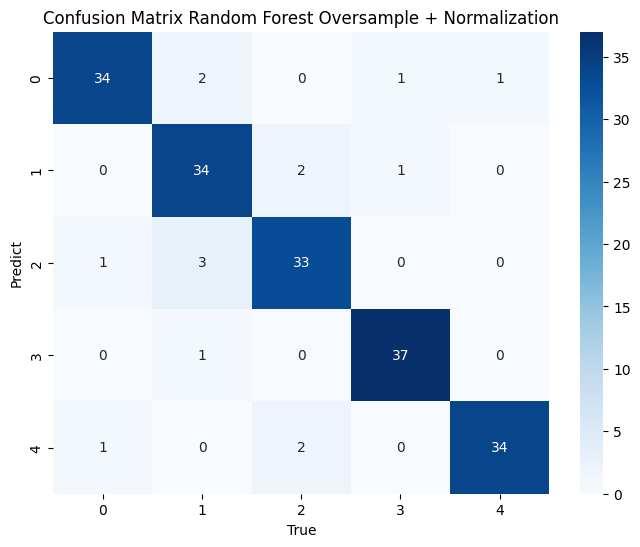

In [67]:
cm = confusion_matrix(y_test_normal, y_pred_rf_normal)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Random Forest Oversample + Normalization")
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### XGBoost

- Membangun dan melatih model XGBoost

In [68]:
xgb_model_normal = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model_normal.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

- Menampilkan hasil evaluasi dari XGBoost dengan normalisasi

In [69]:
y_pred_xgb_normal = xgb_model_normal.predict(X_test_normal)

# Evaluate the XGBoost Model
print("XGBoost Model : ")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb_normal), 3)
print("Accuracy :", accuracy_xgb_smote_normal)
print("Classification Report : ")
print(classification_report(y_test_normal, y_pred_xgb_normal))

XGBoost Model : 
Accuracy : 0.904
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [70]:
evaluation(y_test_normal, y_pred_xgb_normal)

{'accuracy': 0.904, 'recall': 0.904, 'F1 Score': 0.904, 'Precision Score': 0.906}


- Menampilkan hasil Confusion Matrix dari XGBoost dengan normalisasi

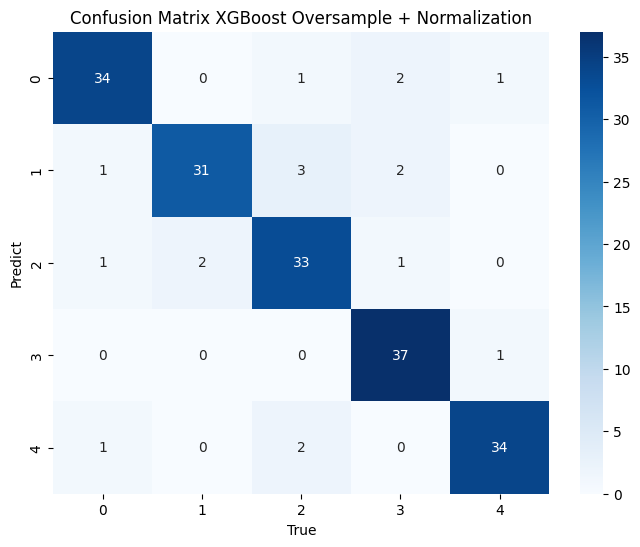

In [71]:
cm = confusion_matrix(y_test_normal, y_pred_xgb_normal)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix XGBoost Oversample + Normalization')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Tunning + Normalization + Oversample

Pada pembuatan model kali ini masih menggunakan algoritma yang sama (KNN, Random Forest, dan XGBoost), namun data yang digunakan adalah data yang sudah dilakukan Tunning Parameter, Normalisasi, dan Oversample

### KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

Setiap parameter tunning tidak selalu sama karena bergantung pada algoritma yang digunakan

In [73]:
knn_model = KNeighborsClassifier()

param_grid = {
    "n_neighbors" : range(3,21),
    "metric" : ["euclidean", "manhattan", "chebyshev"],
    "weights" : ["uniform", "distance"],
    "algorithm" : ["auto", "ball_tree", "kd_tree"],
    "leaf_size" : range(10,61)
}

knn_model_normal_tun = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)
knn_model_normal_tun.fit(X_train_normal, y_train_normal)
best_params_knn = knn_model_normal_tun.best_params_
print(f"Best parameters : {best_params_knn}")

Best parameters : {'weights': 'distance', 'n_neighbors': 4, 'metric': 'manhattan', 'leaf_size': 35, 'algorithm': 'ball_tree'}


- Menampilkan hasil evaluasi dari KNN dengan normalisasi dan tunning parameter

In [74]:
y_pred_knn_normal_tun = knn_model_normal_tun.predict(X_test_normal)

# Evaluate the KNN Model
print("K-Nearest Neighbors (KNN) Model : ")
accuracy_knn_smote_normal_tun = round(accuracy_score(y_test_normal, y_pred_knn_normal_tun), 3)
print("Accuracy :", accuracy_knn_smote_normal_tun)
print("Classification Report : ")
print(classification_report(y_test_normal, y_pred_knn_normal_tun))

K-Nearest Neighbors (KNN) Model : 
Accuracy : 0.93
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.86      0.86      0.86        37
         2.0       0.92      0.92      0.92        37
         3.0       0.97      0.97      0.97        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.93       187
   macro avg       0.93      0.93      0.93       187
weighted avg       0.93      0.93      0.93       187



In [75]:
evaluation(y_test_normal, y_pred_knn_normal_tun)

{'accuracy': 0.93, 'recall': 0.93, 'F1 Score': 0.93, 'Precision Score': 0.93}


- Menampilkan hasil Confusion Matrix dari KNN dengan normalisasi dan tunning parameter

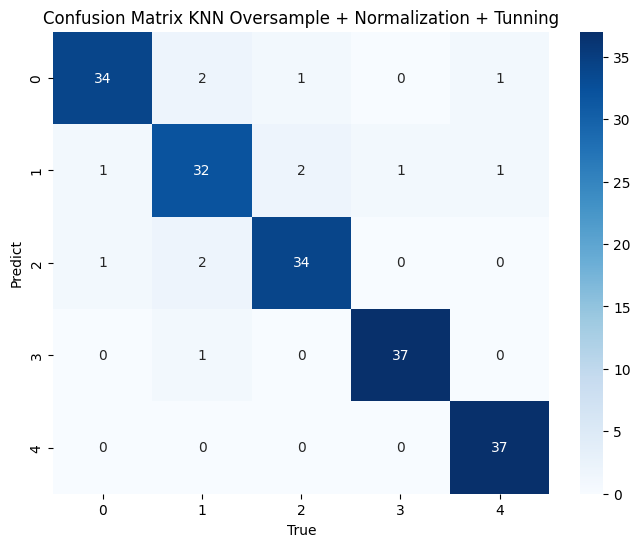

In [76]:
cm = confusion_matrix(y_test_normal, y_pred_knn_normal_tun)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix KNN Oversample + Normalization + Tunning')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### RandomForest

- Melakukan tunning parameter dengan RandomizedSearchCV untuk memperoleh parameter terbaik

In [77]:
rf_model = RandomForestClassifier()

param_grid = {
    "n_estimators" : [100, 200],
    "max_depth" : [10, 15],
    "min_samples_leaf" : [1, 2],
    "min_samples_split" : [2, 5],
    "max_features" : ["sqrt", "log2"],
    # "random_state" : [42, 100, 200]
}

rf_model_normal_tun = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)

rf_model_normal_tun.fit(X_train_normal, y_train_normal)

best_params_rf = rf_model_normal_tun.best_params_
print(f"Best parameters : {best_params_rf}")

c:\Users\Kirei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters : {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}


- Menampilkan hasil evaluasi dari RandomForest dengan normalisasi dan tunning parameter

In [78]:
y_pred_rf_normal_tun = rf_model_normal_tun.predict(X_test_normal)

# Evaluate the Random Forest Model
print("Random Forest Model : ")
accuracy_rf_smote_normal_tun = round(accuracy_score(y_test_normal, y_pred_rf_normal_tun), 3)
print("Accuracy :", accuracy_rf_smote_normal_tun)
print("Classification Report : ")
print(classification_report(y_test_normal, y_pred_rf_normal_tun))

Random Forest Model : 
Accuracy : 0.92
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.89      0.89      0.89        37
         2.0       0.87      0.89      0.88        37
         3.0       0.93      0.97      0.95        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [79]:
evaluation(y_test_normal, y_pred_rf_normal_tun)

{'accuracy': 0.92, 'recall': 0.92, 'F1 Score': 0.92, 'Precision Score': 0.921}


- Menampilkan hasil Confusion Matrix dari RandomForest dengan normalisasi dan tunning parameter

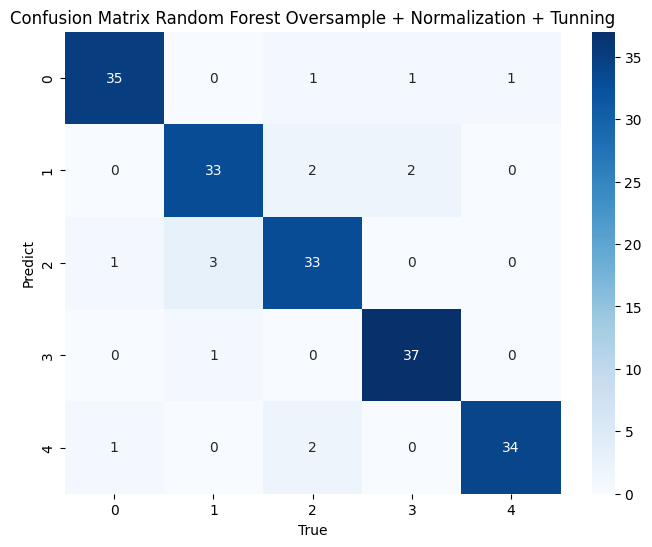

In [80]:
cm = confusion_matrix(y_test_normal, y_pred_rf_normal_tun)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix Random Forest Oversample + Normalization + Tunning')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### XGBoost

- Melakukan tunning parameter dengan RandomizedSearchCV untuk memperoleh parameter terbaik

In [81]:
xgb_model = XGBClassifier()

param_grid = {
    "max_depth" : [3, 5, 7],
    "learning_rate" : [0.01, 0.1],
    "n_estimators" : [100, 200],
    "gamma" : [0, 0.1],
    "colsample_bytree" : [0.7, 0.8]
}

xgb_model_normal_tun = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

xgb_model_normal_tun.fit(X_train_normal, y_train_normal)

best_params_xgb = xgb_model_normal_tun.best_params_
print(f"Best parameters : {best_params_xgb}")

Best parameters : {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}


- Menampilkan hasil evaluasi dari XGBoost dengan normalisasi dan tunning parameter

In [82]:
y_pred_xgb_normal_tun = xgb_model_normal_tun.predict(X_test_normal)

# Evaluate the XGBoost model
print("XGBoost Model : ")
accuracy_xgb_smote_normal_tun = round(accuracy_score(y_test_normal, y_pred_xgb_normal_tun), 3)
print("accuracy :", accuracy_xgb_smote_normal_tun)
print("Classification Report : ")
print(classification_report(y_test_normal, y_pred_xgb_normal_tun))

XGBoost Model : 
accuracy : 0.92
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92        38
         1.0       0.89      0.86      0.88        37
         2.0       0.89      0.86      0.88        37
         3.0       0.95      1.00      0.97        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [83]:
evaluation(y_test_normal, y_pred_xgb_normal_tun)

{'accuracy': 0.92, 'recall': 0.92, 'F1 Score': 0.919, 'Precision Score': 0.92}


- Menampilkan hasil Confusion Matrix dari XGBoost dengan normalisasi dan tunning parameter

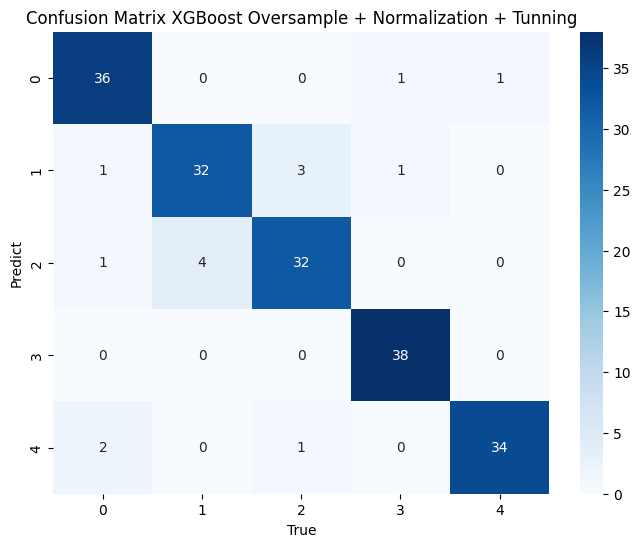

In [84]:
cm = confusion_matrix(y_test_normal, y_pred_xgb_normal_tun)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix XGBoost Oversample + Normalization + Tunning')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### 8) Evaluasi

Selanjutnya akan dilakukan evaluasi data sekaligus membandingkan antar algoritma guna mengetahui jenis model algoritma yang menghasilkan hasil akurasi terbaik.

##### Oversampling

- Perbandingan akurasi algoritma dengan oversample

In [85]:
import matplotlib.pyplot as plt

model_comp1 = pd.DataFrame({
    'Model': ['K-Nearest Neighbour', 'Random Forest', 'XGBoost'],
    'Accuracy' : [accuracy_knn_smote*100, accuracy_rf_smote*100, accuracy_xgb_smote*100]
})
model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.0
2,XGBoost,90.4


- Membuat bar plot untuk melihat perbandingan antar algoritma

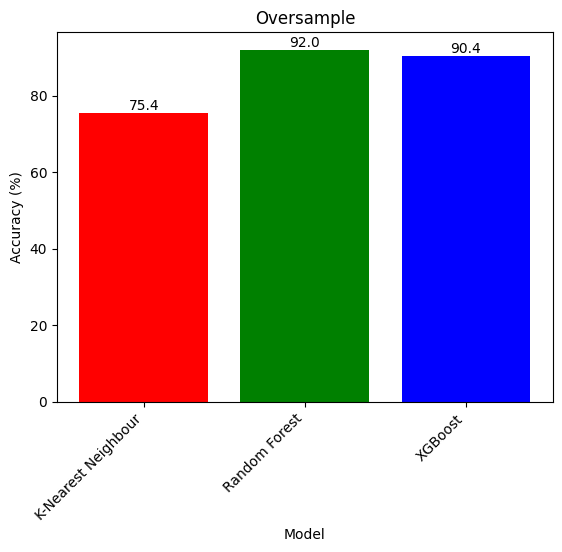

In [86]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') #untuk memutar label sumbu-x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars :
  yval= bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

##### Oversampling + Normalisasi

- Perbandingan akurasi algoritma dengan oversample dan normalisasi

In [87]:
model_comp2 = pd.DataFrame({
    'Model' : ['K-Nearest Neighbour', 'Random Forest', 'XGBoost'],
    'Accuracy' : [accuracy_knn_smote_normal*100, accuracy_rf_smote_normal*100, accuracy_xgb_smote_normal*100]
})
model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,86.1
1,Random Forest,92.0
2,XGBoost,90.4


- Membuat bar plot untuk melihat perbandingan antar algoritma

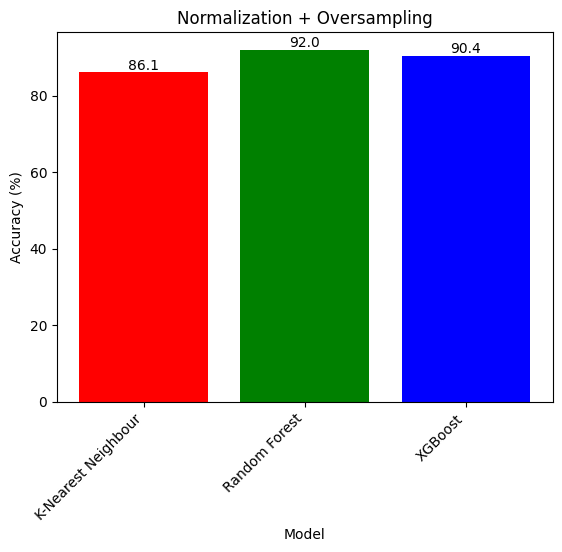

In [88]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu-x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,2), ha='center', va='bottom')
plt.show()

##### Oversampling + Normalisasi + Tunning Parameter

- Perbandingan akurasi algoritma dengan oversample, normalisasi, dan tunning parameter

In [89]:
model_comp3 = pd.DataFrame({
    'Model' : ['K-Nearest Neighbour', 'Random Forest', 'XGBoost'],
    'Accuracy' : [accuracy_knn_smote_normal_tun *100, accuracy_rf_smote_normal_tun*100, accuracy_xgb_smote_normal_tun*100]
})
model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,93.0
1,Random Forest,92.0
2,XGBoost,92.0


- Membuat bar plot untuk melihat perbandingan antar algoritma

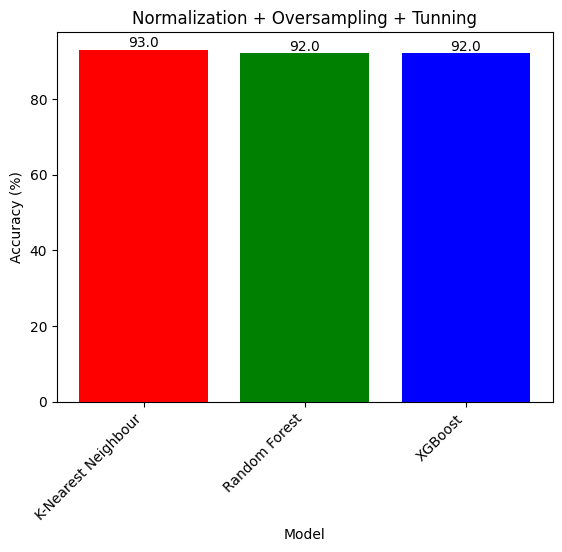

In [90]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu-x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars :
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

##### Algoritma Terbaik untuk Tiap Kondisi

- Perbandingan algoritma terbaik dari setiap kondisi

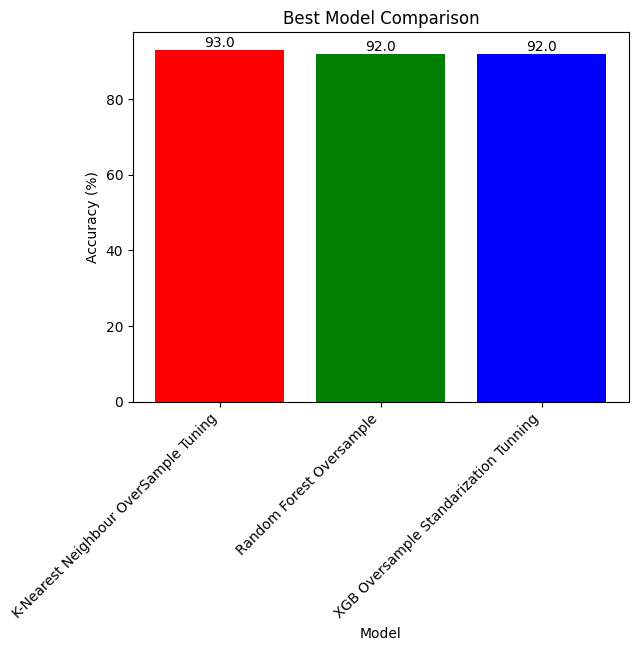

In [91]:
# Data Frame
model_compBest = pd.DataFrame({
    'Model' : ['K-Nearest Neighbour OverSample Tuning', 'Random Forest Oversample', 'XGB Oversample Standarization Tunning'],
    'Accuracy' : [accuracy_knn_smote_normal_tun*100, accuracy_rf_smote_normal*100, accuracy_xgb_smote_normal_tun*100]
})

# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu-x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

### 9) Streamlit

### Save pickle model

In [92]:
# simpan model kedalam file dengan pickle
pickle.dump(knn_model_normal_tun, open('knn_smote_normal_tun_model.pkl', 'wb'))

# menyimpan informasi model 
model_info = {'dataframe': dfClean, 'accuracy': accuracy_knn_smote_normal_tun*100}
with open('model_info.pkl', 'wb') as file:
    pickle.dump(model_info, file)

### 10) Kesimpulan

Berdasarkan percobaan yang telah dilakukan di atas dengan algoritma KNN, Random Forest, dan XGBoost pada berbagai kondisi meliputi penyeimbangan data dengan random oversampling SMOTE, normalisasi dengan MinMaxScaler, dan tunning parameter dengan RandomSearchCV, dapat diperoleh hasil sebagai berikut :

- Klasifikasi dengan menggunakan data yang di-oversampling menggunakan SMOTE memperoleh nilai tertinggi pada model RandomForest yaitu sebesar 92%, sementara itu pada model XGBoost memperoleh akurasi sebesar 90.4% dan pada model KNN sebesar 75.4%

- Klasifikasi dengan menggunakan data yang di-oversampling menggunakan SMOTE dan normalisasi dengan MinMaxScaler memperoleh nilai tertinggi pada model RandomForest yaitu sebesar 92%, sementara itu pada model XGBoost memperoleh akurasi sebesar 90.4% dan pada model KNN sebesar 86.1%

- Klasifikasi dengan menggunakan data yang di-oversampling menggunakan SMOTE, normalisasi dengan MinMaxScaler, dan tunning parameter dengan RandomizedSearchCV memperoleh nilai tertinggi yaitu sebesar 93% pada model KNN, sementara itu pada model Random Forest dan XGBoost menghasilkan akurasi sebesar 92%

Berdasarkan hasil dari percobaan tersebut dapat disimpulkan bahwa perbedaan kondisi yang diberikan menghasilkan pengaruh yang signifikan terhadap akurasi model, khususnya peningkatan akurasi pada model KNN dan XGBoost meskipun tidak demikian pada model Random Forest. Dengan berbagai kondisi yang diberikan, performa model terbaik diperoleh oleh model KNN yang disertai dengan oversampling, normalisasi, dan tunning parameter yaitu akurasi sebesar 93%